### Problem Statement

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, 
- Loan_Amount, Loan_Amount_Term, Credit History Property_Area

Dependent Variables:
- Loan Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

### Importing the all required libraries

In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [270]:
df=pd.read_csv('loan_prediction.csv') # loading the dataset and storing it into dataframe named df

In [271]:
df.shape

(614, 13)

Dataset contain 614 rows and 13 columns

In [272]:
df.size

7982

Dataset has total 7982 number of elements.

In [273]:
# Printing the first five rows of the dataframe.
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [274]:
# Printing the last 5 data points
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [275]:
# Shows the name of all 13 columns
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [276]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

There are three types of datatypes object,float and integer in dataset.

In [277]:
# Shows the unique values present in each column
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [278]:
# Summarizing the dataset in statistic format
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


- We can see that the count of column is not equal so there are missing values that needs to be treated.
- Minimum value in loan amount is 9 and Maximum loan amount is 700.

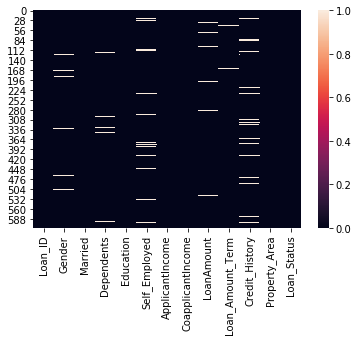

In [279]:
# Checking for any missing valules in dataset
sn.heatmap(df.isnull())

- We can see some of the white lines in the heat map that shows the presence of nan values in the given data set.
- We will be treating these values.
- In order to get more clearity we have taken out the sum of the total Null Values down which is also giving us the same output that is ,' 0 '.

In [280]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History have null values.

### Treating missing values

#### Replacing the missing values with mode method because the either of the class is highly greater than other class.

In [281]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Married'].fillna(df['Married'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)
df['Education'].fillna(df['Gender'].mode()[0], inplace = True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [282]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [283]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace = True) # Replacing with median because it is not normally distributed. 

In [284]:
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode().values[0])

In [285]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now we can see that there are no null or missing values in the dataset.

In [286]:
# Finding the unique values present in categorical variables

### Target variable

In [287]:
#Target Variable
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

There are 422 number of people whose loan got approved and 192 member whose loan is not approved.

### Independent variables

In [288]:
#Independent variables
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [289]:
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [290]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [291]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [292]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [293]:
df['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

### Exploratory Data Anaylsis(EDA) 

In [294]:
df.keys()

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#### Univariate Anaylsis

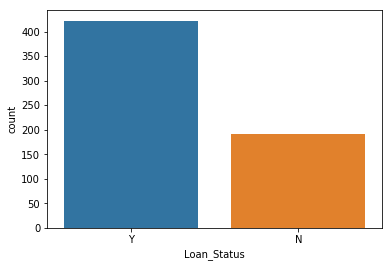

In [295]:
#Target Variable
sn.countplot(df['Loan_Status'])

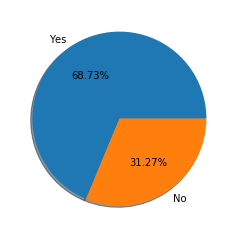

In [296]:
# Pie chart for class variable Loan Status
labels='Yes','No'
fig,ax=plt.subplots()
ax.pie(df['Loan_Status'].value_counts(),labels=labels,autopct='%1.2f%%',shadow=True)
plt.show()

Arround 69% or 422 Applicants got Approvals for Loan.

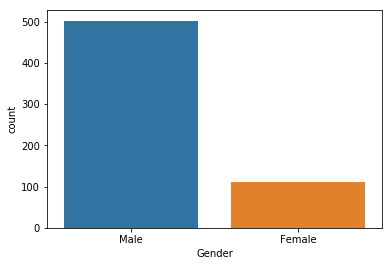

In [297]:
sn.countplot(df['Gender'])

Male number of applicants i.e 489 are much higher than female applicants which are 112.

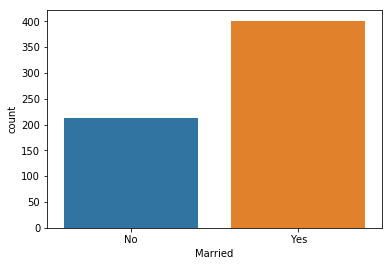

In [298]:
sn.countplot(df['Married'])

There are approximately 400 applicants which are married.

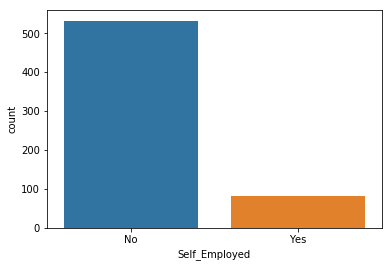

In [299]:
sn.countplot(df['Self_Employed'])

There are only 82 applicants which are self employed.

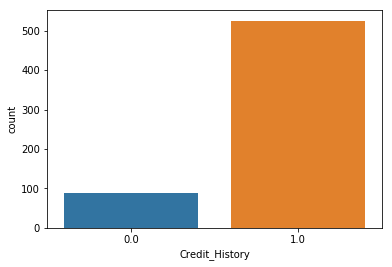

In [300]:
sn.countplot(df['Credit_History'])

More than 80% Applicants have a Good Credit Score.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

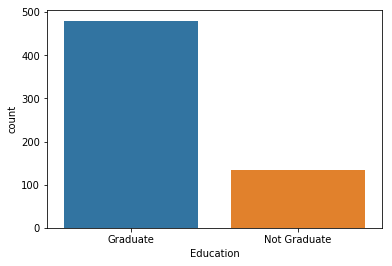

In [301]:
sn.countplot(df['Education'])
df['Education'].value_counts()

Applicants who are graduate are 480 in total.

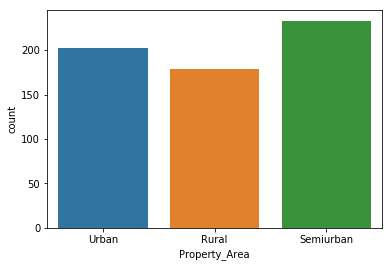

In [302]:
sn.countplot(df['Property_Area'])

Most number of applicants are from Semiurban followed by Urban

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

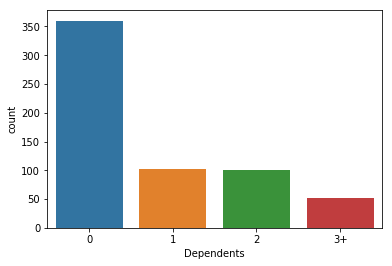

In [303]:
sn.countplot(df['Dependents'])
df['Dependents'].value_counts()

Maximum number of applicants dont have dependents.

In [304]:
df.select_dtypes(['int64','float64']).head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,128.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0


### Plotting Box plot for all numerical features

In [305]:
Numerical=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

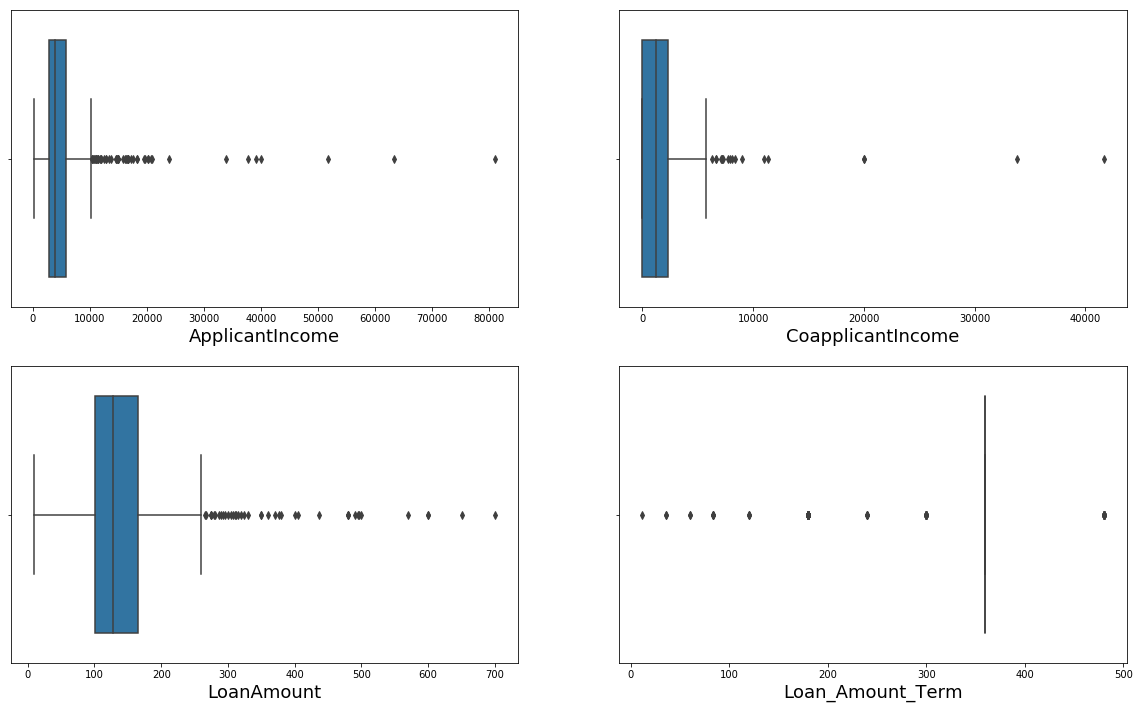

In [306]:
plt.figure(figsize=(20,12),facecolor='white')
plotnumber=1
for column in df[Numerical]:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sn.boxplot(df[column])
        plt.xlabel(column,fontsize=18)
    plotnumber=plotnumber+1
plt.show()

-  Outliers are clearly visible in box plot above.
-  Major outlier are present in LoanAmount,Applicant Income, Coapplicant income and Loan_Amount Term. 
-  Outier indicates that the data is not normally distributed.

### Plotting distribution plot for all features

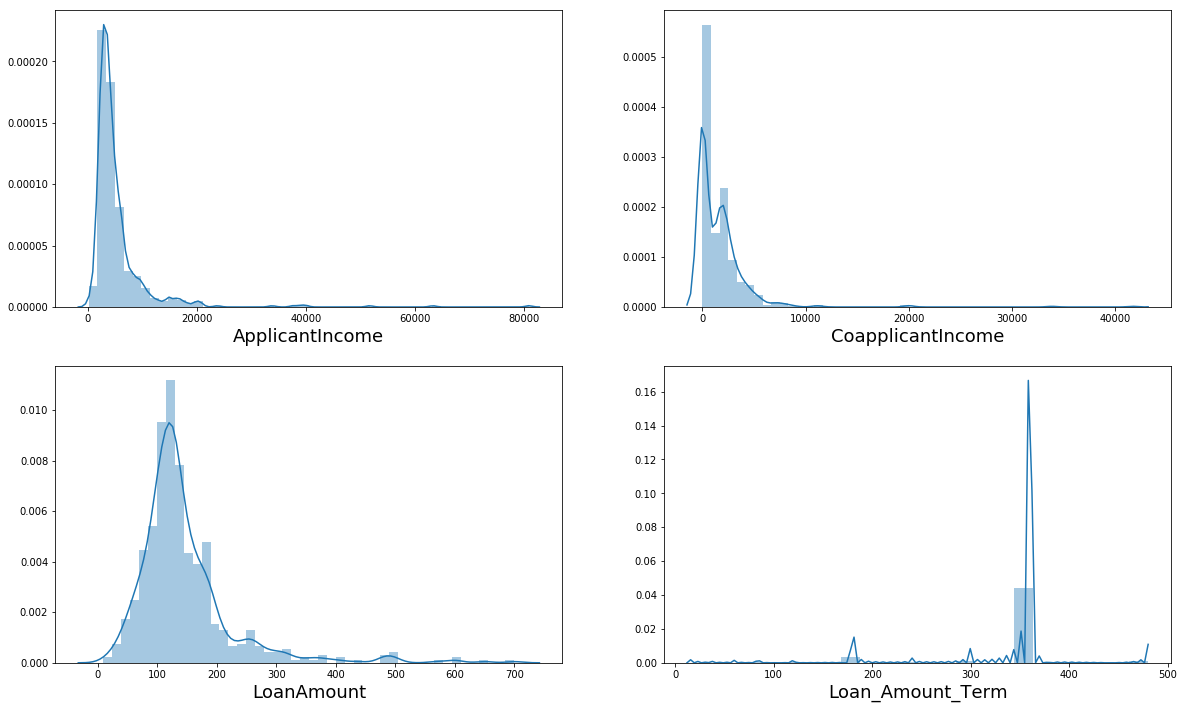

In [307]:
plt.figure(figsize=(20,12),facecolor='white')
plotnumber=1
for column in df[Numerical]:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sn.distplot(df[column])
        plt.xlabel(column,fontsize=18)
    plotnumber=plotnumber+1
plt.show()

- Applicant income,Coapplicant income and Loan Amount are showing positive righ skewed distribution.
- Loan Amount Term is showing the left skewed distribution.
-  Log transformation can be used to remove the skeweness.

### Bivariate Anaylsis

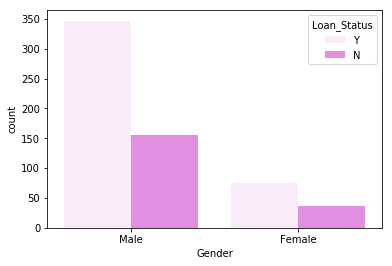

In [308]:
#Count of Loan Approved or not Approved based on Gender.
sn.countplot(x='Gender', hue='Loan_Status', data=df,color='Violet')

Applicants whose loan approved are majority of males.

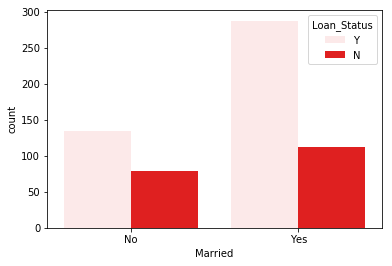

In [309]:
#Count of loan approved or not based on Marital Status
sn.countplot(x='Married', hue='Loan_Status', data=df,color='Red')

Majority of Loan approved applicants are married peoples.

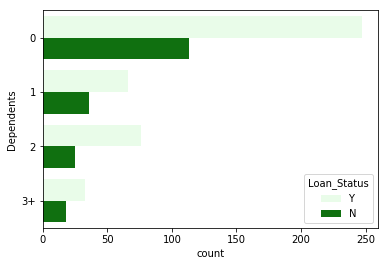

In [310]:
# Loan Approved or not Approved based on Dependents.
sn.countplot(y='Dependents', hue='Loan_Status', data=df,color='Green')

Applicants who have 0 depenedents are more likely to get loan approved.

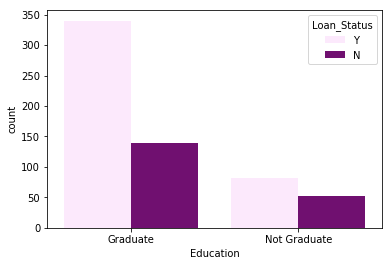

In [311]:
# Loan Approved or not Approved based on Education.
sn.countplot(x='Education', hue='Loan_Status', data=df,color='purple')

The graduate people are more likely to get loan approved than non graduate one.

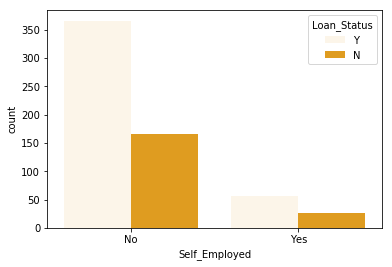

In [312]:
# Loan Approved or not Approved based on Self Employed or not.
sn.countplot(x='Self_Employed', hue='Loan_Status', data=df,color='Orange')

Self employed people have very less chances of getting loan aprroved.

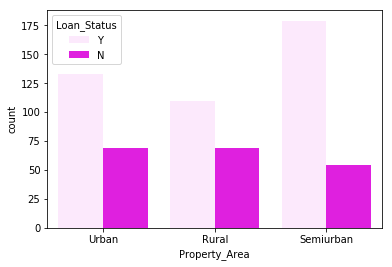

In [313]:
# Loan Approved or not Approved based on Property area.
sn.countplot(x='Property_Area', hue='Loan_Status', data=df,color='Magenta')

More number of people are from semiurban area and are likely to get loan approved.

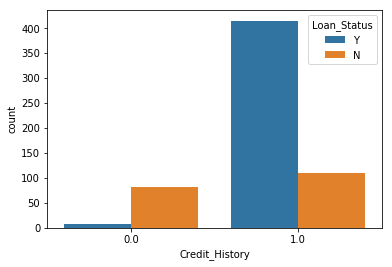

In [314]:
# Loan Approved or not Approved based on Credit History.
sn.countplot(x='Credit_History', hue='Loan_Status', data=df)

Applicants who have credit history of 1 have more than 80 percent chances of getting loan approved and people who credit score significantly very less chances of loan getting approved.

### Label Encoding

In [315]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtypes == 'object': # encoding all categorical columns
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


### Multivariate Anaylsis

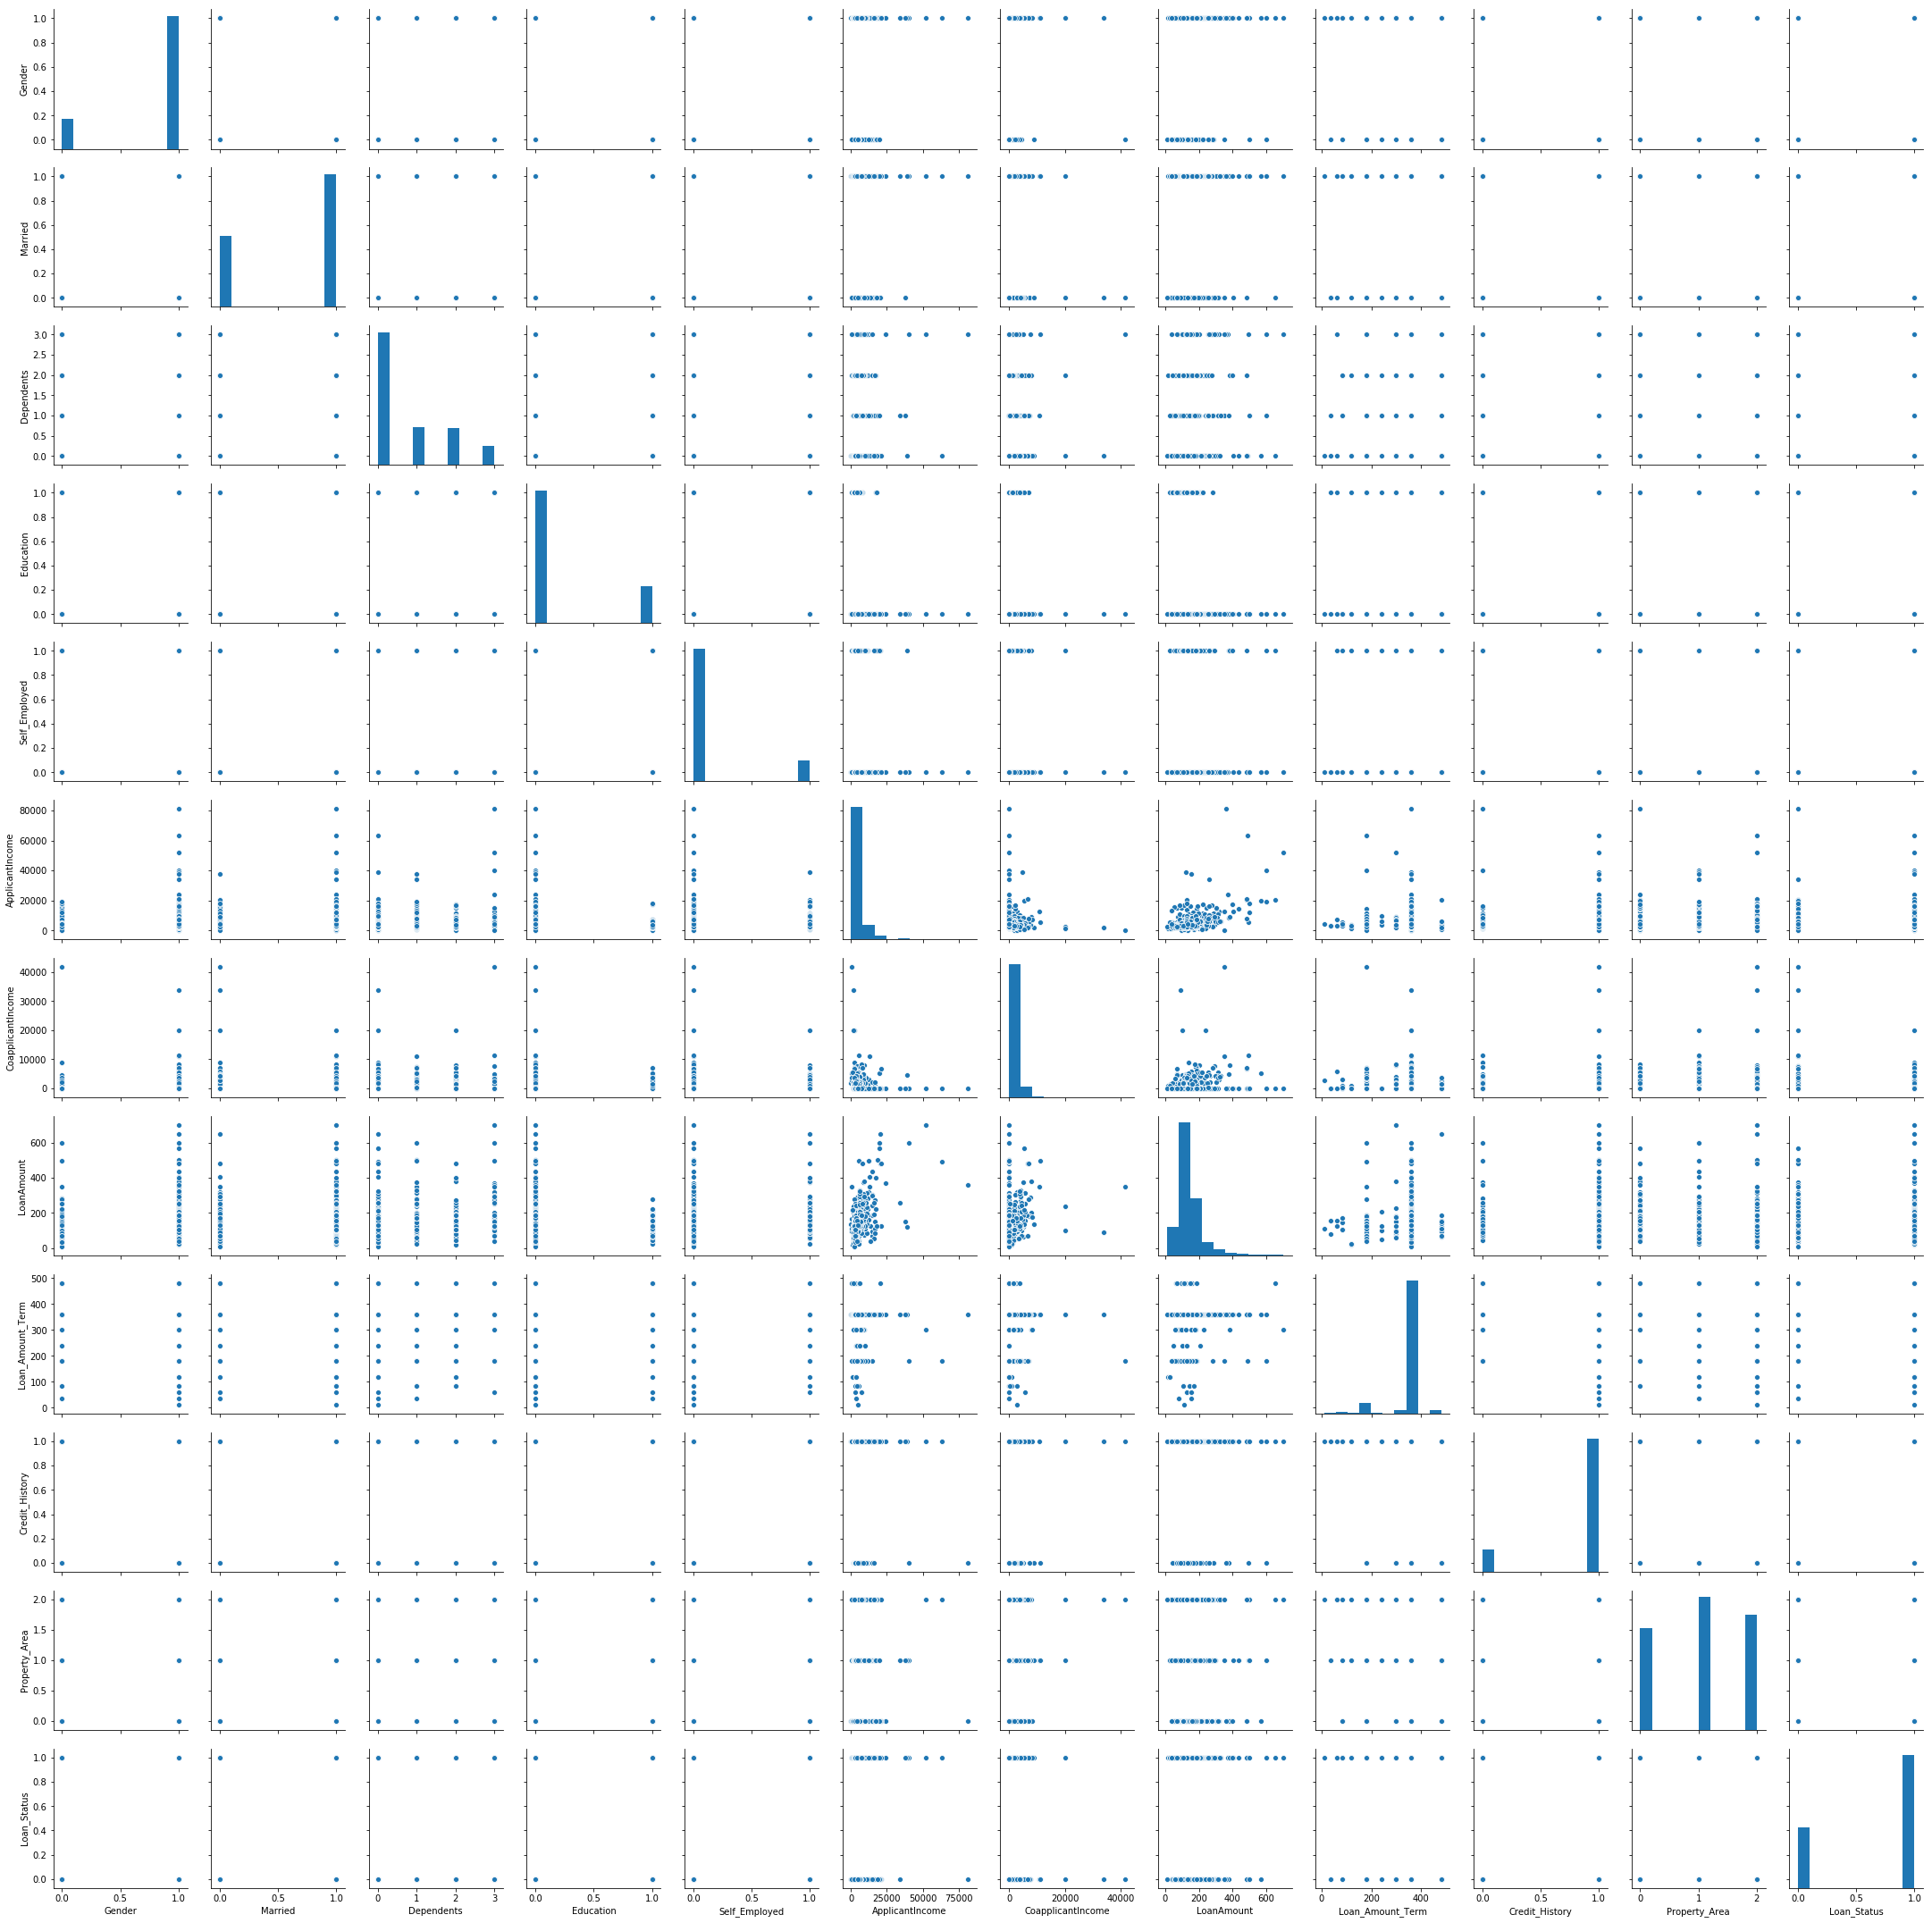

In [379]:
#plotting relationship between all the variables
sn.pairplot(df)

Through the above and below graph we have come accros to the attributes or the fields which are positively corelated or neutral corelated to each other, Hence we would be taking them in to the consideration.
Fields : 'ApplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'
These fields are some what showing neutral correlation with each other.
Credit_History shows strong correlation with target variabel loan status

### Heatmap for checking correlation of encoded features

In [316]:
cor=df.corr()
cor

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.036872,-0.033028,-0.030603,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106904,-0.074030,0.009170,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146546,-0.100912,0.010938,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163103,-0.103864,-0.040160,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.036872,0.106904,0.146546,0.163103,-0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.046632,-0.033214
Loan_Amount_Term,-0.033028,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.076120,-0.022549


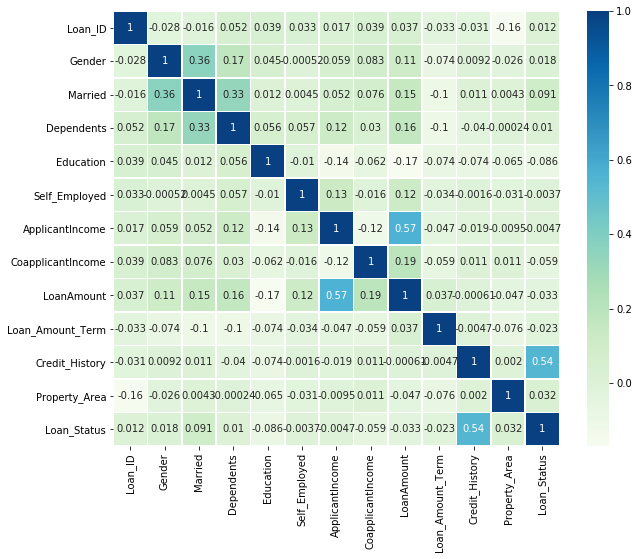

In [317]:
# Plotting heatmap
fig, axis = plt.subplots(figsize=(10, 8))
sn.heatmap(cor,annot=True,linewidths=.5,cmap='GnBu')

- Loan amount and Applicant income have strong correlation.
- Credit history and Loan Status are strongly correlated.

### Data clenaing 

In [318]:
#Dropping the unnecessary columns Loan ID which is of no use.
df.drop("Loan_ID", axis=1,inplace=True)

In [319]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0


In [320]:
df.shape

(614, 12)

### Removing the Outliers

In [321]:
from scipy.stats import zscore
z=np.abs(zscore(df))
new_df=df[(z<3.57).all(axis=1)]

In [322]:
df.shape

(614, 12)

In [323]:
new_df.shape

(585, 12)

In [377]:
# Data loss percentage
Data_loss=(df.shape[0]-new_df.shape[0])/df.shape[0]*100
Data_loss

4.723127035830619

After removing the outliers from the data the shape of the data has change from (614,12) to (585,12) which shows that with the z score method we are able to remove various rows with lossing about 4.73 percent of data , Hence our new data shape is (585,12).

### Chekcking for Skewness

In [325]:
new_df[Numerical].skew()

ApplicantIncome      2.269125
CoapplicantIncome    1.535617
LoanAmount           1.424895
Loan_Amount_Term    -2.157886
dtype: float64

Normal Skewness range is -0.5 to + 0.5 but the columns are out of the range

### Using Power transformation to remove the skewness

In [326]:
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='yeo-johnson')
new_df[Numerical]=scaler.fit_transform(new_df[Numerical].values)

In [327]:
new_df[Numerical].skew()

ApplicantIncome      0.016696
CoapplicantIncome   -0.175778
LoanAmount           0.062015
Loan_Amount_Term     0.699305
dtype: float64

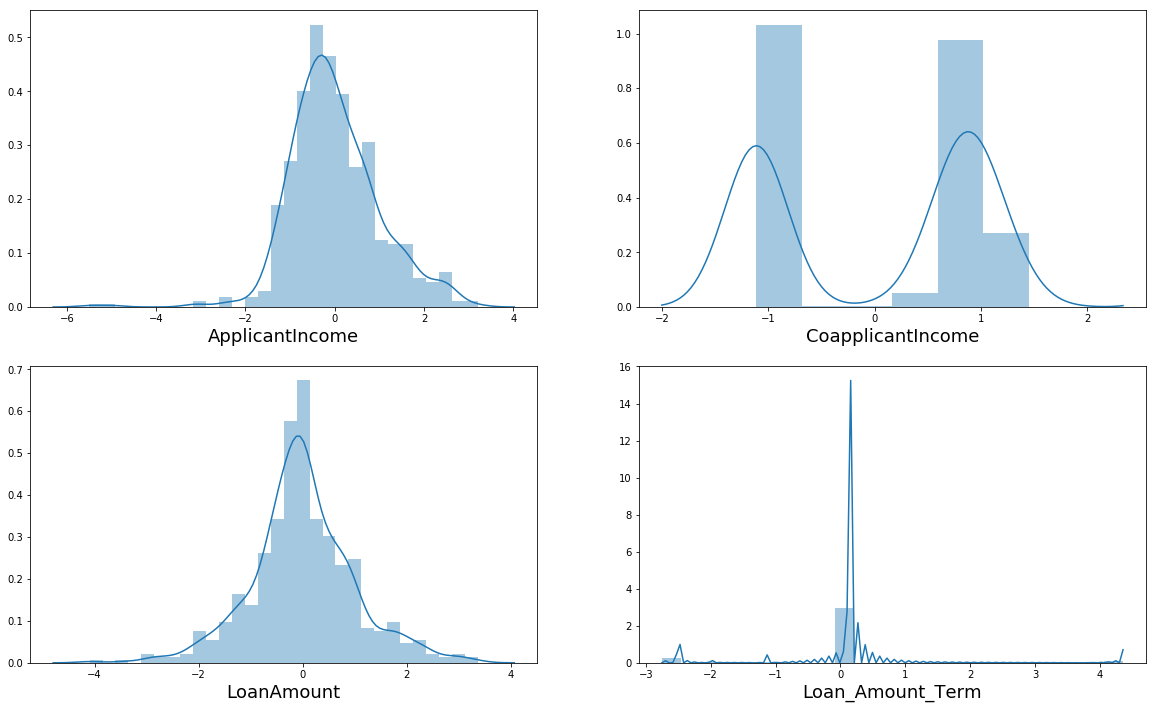

In [328]:
#Plotting distribution plot 
plt.figure(figsize=(20,12),facecolor='white')
plotnumber=1
for column in new_df[Numerical]:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sn.distplot(new_df[column])
        plt.xlabel(column,fontsize=18)
    plotnumber=plotnumber+1
plt.show()

- After applying the log transformation technique the distribution now looks closer to the normal distribution curve
- Larger Values are Normalized
- Loan Amount shows more or less normal distribution curve.

### Splitting the dataset into indepenedent and dependent variables

In [329]:
x = new_df.drop(['Loan_Status'], axis = 1)
y=new_df['Loan_Status']

In [330]:
print(x.shape)
x.head()

(585, 11)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,0.651500,-1.113075,-0.004751,0.139451,1.0,2
1,1,1,1,0,0,0.218095,0.754158,-0.004751,0.139451,1.0,0
2,1,1,0,0,1,-0.526687,-1.113075,-1.366594,0.139451,1.0,2
3,1,1,0,1,0,-0.787281,0.902399,-0.149903,0.139451,1.0,2
4,1,0,0,0,0,0.696989,-1.113075,0.218212,0.139451,1.0,2


In [331]:
print(y.shape)
y.head()

(585,)


0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

### Finding the best random state

In [335]:
from sklearn.linear_model import LogisticRegression
MaxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>MaxAccu:
        MaxAccu=acc
        maxRS=i
print("Best accuracy is",MaxAccu,'on random state',maxRS)

Best accuracy is 0.8806818181818182 on random state 165


### Creating a train test split

In [336]:
# Splitting the dataset into trianing and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=maxRS)

### Standard Scaler

In [337]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

### Applying different models or algorithms

Accuracy score using logistic regression model is 88.06818181818183
F1 Score is  92.19330855018588
Cross validation score 82.05128205128204
-----------------------------
              precision    recall  f1-score   support

           0       0.97      0.61      0.75        51
           1       0.86      0.99      0.92       125

    accuracy                           0.88       176
   macro avg       0.91      0.80      0.83       176
weighted avg       0.89      0.88      0.87       176

-----------------------------

 Confusion Matrix


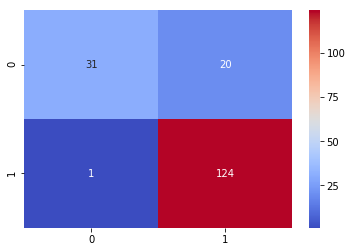

In [348]:
#Using logistic regression 
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)
pred=classifier.predict(x_test)
lr_acc=accuracy_score(y_test,pred)
print('Accuracy score using logistic regression model is',lr_acc*100)
lr_f1=f1_score(y_test,pred)
print("F1 Score is ",lr_f1*100)
lr_cv=cross_val_score(classifier,x,y,cv=5).mean()
print("Cross validation score",lr_cv*100)
print('-----------------------------')
lr_acc1=classification_report(y_test,pred)
print(lr_acc1)
con_mat = confusion_matrix(y_test,pred)
print('-----------------------------')
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")

Accuracy of Decision Tree classification is  69.88636363636364
F1 Score is  76.44444444444444
Cross validation score 71.45299145299145
              precision    recall  f1-score   support

           0       0.49      0.73      0.58        51
           1       0.86      0.69      0.76       125

    accuracy                           0.70       176
   macro avg       0.67      0.71      0.67       176
weighted avg       0.75      0.70      0.71       176


 Confusion Matrix


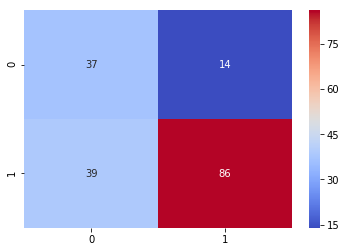

In [349]:
# Using Decision Tree Classification algorithm
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)
dtc_acc=accuracy_score(y_test,pred)
print("Accuracy of Decision Tree classification is ",dtc_acc*100)
dtc_f1=f1_score(y_test,pred)
print("F1 Score is ",dtc_f1*100)
CV3=cross_val_score(DTC,x,y,cv=5).mean()
print("Cross validation score",CV3*100)
#Printing confusion matrix
con_mat = confusion_matrix(y_test,pred)
dtc_acc1=classification_report(y_test,pred)
print(dtc_acc1)
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")

Accuracy score using GuassianNB classifier model is 87.5
F1 Score is  91.66666666666666
Cross validation score 81.36752136752136
-------------------------------
              precision    recall  f1-score   support

           0       0.89      0.65      0.75        51
           1       0.87      0.97      0.92       125

    accuracy                           0.88       176
   macro avg       0.88      0.81      0.83       176
weighted avg       0.88      0.88      0.87       176

-------------------------------

 Confusion Matrix


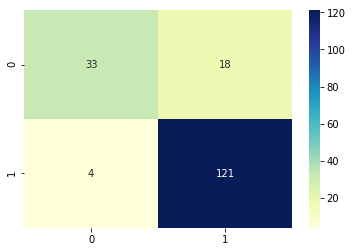

In [350]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_train, y_train)
pred=NB.predict(x_test)
gnb_acc=accuracy_score(y_test,pred)
print('Accuracy score using GuassianNB classifier model is',gnb_acc*100)
gnb_cv=cross_val_score(NB,x,y,cv=5).mean()
gnb_f1=f1_score(y_test,pred)
print("F1 Score is ",gnb_f1*100)
print("Cross validation score",gnb_cv*100)
print('-------------------------------')
acc=classification_report(y_test,pred)
print(acc)
con_mat = confusion_matrix(y_test,pred)
print('-------------------------------')
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

Accuracy of Random Forest Classificarion is  86.36363636363636
Cross validation score 79.65811965811966
F1 Score is  90.76923076923077
-------------------------------
              precision    recall  f1-score   support

           0       0.83      0.67      0.74        51
           1       0.87      0.94      0.91       125

    accuracy                           0.86       176
   macro avg       0.85      0.81      0.82       176
weighted avg       0.86      0.86      0.86       176

-------------------------------

 Confusion Matrix


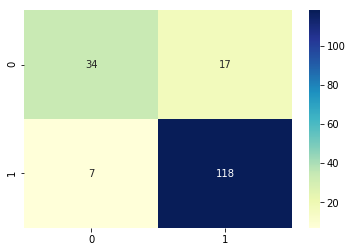

In [351]:
#Using random forest classification
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier() # creating instance of class
RF.fit(x_train,y_train) #Fitting the data
pred=RF.predict(x_test) # Predicting the data 
rfc_acc=accuracy_score(y_test,pred)
print("Accuracy of Random Forest Classificarion is ",rfc_acc*100)
rfc_cv=cross_val_score(RF,x,y,cv=5).mean()
print("Cross validation score",rfc_cv*100)
rfc_f1=f1_score(y_test,pred)
print("F1 Score is ",rfc_f1*100)
print('-------------------------------')
acc=classification_report(y_test,pred)
print(acc)
con_mat = confusion_matrix(y_test,pred)
print('-------------------------------')
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

Accuracy of Support Vector Classification is  88.06818181818183
F1 Score is  92.0754716981132
Cross validation score 81.36752136752136
              precision    recall  f1-score   support

           0       0.92      0.65      0.76        51
           1       0.87      0.98      0.92       125

    accuracy                           0.88       176
   macro avg       0.89      0.81      0.84       176
weighted avg       0.88      0.88      0.87       176


 Confusion Matrix


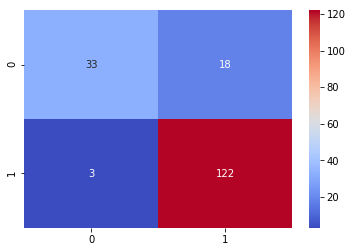

In [352]:
#Using Support vector classification
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
svc_acc=accuracy_score(y_test,pred)
print("Accuracy of Support Vector Classification is ",svc_acc*100)
CV2=cross_val_score(svc,x,y,cv=5).mean()
svc_f1=f1_score(y_test,pred)
print("F1 Score is ",svc_f1*100)
print("Cross validation score",CV2*100)
svc_acc1=classification_report(y_test,pred)
print(svc_acc1)
con_mat = confusion_matrix(y_test,pred)
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")

Accuracy score using gradient boosting classifier model is 88.06818181818183
F1 Score is  91.95402298850574
Cross validation score 78.80341880341881
              precision    recall  f1-score   support

           0       0.88      0.69      0.77        51
           1       0.88      0.96      0.92       125

    accuracy                           0.88       176
   macro avg       0.88      0.82      0.84       176
weighted avg       0.88      0.88      0.88       176


 Confusion Matrix


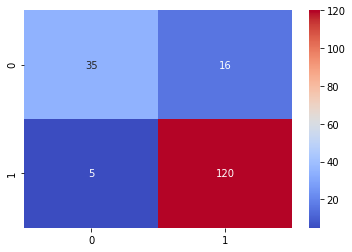

In [353]:
### using gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier()
clf.fit(x_train, y_train)
pred=clf.predict(x_test)
gbc_acc=accuracy_score(y_test,pred)
print('Accuracy score using gradient boosting classifier model is',gbc_acc*100)
gbc_f1=f1_score(y_test,pred)
print("F1 Score is ",gbc_f1*100)
CV5=cross_val_score(clf,x,y,cv=5).mean()
print("Cross validation score",CV5*100)
gbc_acc1=classification_report(y_test,pred)
print(gbc_acc1)
con_mat = confusion_matrix(y_test,pred)
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")

In [359]:
model=['Logistic Regression','Decision Tree Classifier',' GuassianNB classifier','Random Forest Classifier',
       'Support Vector Classifier','Gradient boosting classifier']
acc=[lr_acc*100,dtc_acc*100,gnb_acc*100,rfc_acc*100,svc_acc*100,gbc_acc*100]
f1=[lr_f1*100,dtc_f1*100,gnb_f1*100,rfc_f1*100,svc_f1*100,gbc_f1*100]

cv_score=[lr_cv*100,CV3*100,gnb_cv*100,rfc_cv*100,CV2*100,CV5*100]
result=pd.DataFrame({'Model':model,'Accuracy_score':acc,'F1_Score':f1,'CV_score':cv_score})
result
# Creting dataframe to store accuracyand cv score of all the models.

,Model,Accuracy_score,F1_Score,CV_score
0,Logistic Regression,88.068182,92.193309,82.051282
1,Decision Tree Classifier,69.886364,76.444444,71.452991
2,GuassianNB classifier,87.500000,91.666667,81.367521
3,Random Forest Classifier,86.363636,90.769231,79.658120
4,Support Vector Classifier,88.068182,92.075472,81.367521
5,Gradient boosting classifier,88.068182,91.954023,78.803419


### Choosing the model

- We will be considering the F1 score as evaluation metrics as there is class imbalanced problem  for choosing the best model.
- Logistic Regression is giving highest f1 score of 92.19, so choosing it as best model.

### Applying hyperparamter tuning to best accuracy model

In [360]:
parameters= {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [1.1,1.3,1.4,1.6],
    'max_iter':[100,150,200],
    'multi_class':['auto', 'ovr', 'multinomial'],
    }

In [362]:
GCV=GridSearchCV(LogisticRegression(),parameters,cv=5)

In [363]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1.1, 1.3, 1.4, 1.6], 'max_iter': [100, 150, 200],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']})

In [364]:
GCV.best_params_

{'C': 1.1, 'max_iter': 100, 'multi_class': 'auto', 'penalty': 'l2'}

F1 Score using Logistic reression is  92.19330855018588
              precision    recall  f1-score   support

           0       0.97      0.61      0.75        51
           1       0.86      0.99      0.92       125

    accuracy                           0.88       176
   macro avg       0.91      0.80      0.83       176
weighted avg       0.89      0.88      0.87       176

-------------------------------

 Confusion Matrix


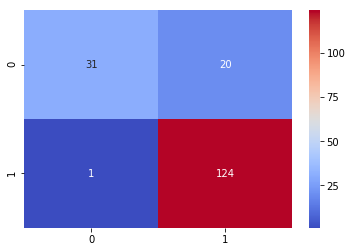

In [371]:
Final_model=LogisticRegression(C=1.5,max_iter=100,multi_class='auto',penalty='l2')
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc_final=f1_score(y_test,pred)
print("F1 Score using Logistic reression is ",acc_final*100)
acc=classification_report(y_test,pred)
print(acc)
con_mat = confusion_matrix(y_test,pred)
print('-------------------------------')
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")

### Plotting Roc Curve for best model

In [373]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
#Receiver operator charactersitics(ROC)
fpr,tpr,thresholds=roc_curve(y_test,pred)

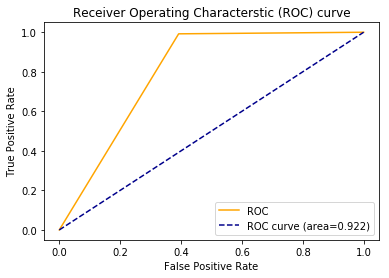

In [374]:
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve (area=%0.3f)'% acc_final)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic (ROC) curve')
plt.legend()
plt.show()

#### Conclusion

Logistic regression is giving highest f1 score of 92.2 

### Saving the Model

In [375]:
import joblib
import sys
sys.modules['sklearn.externals.joblib']=joblib
from sklearn.externals import joblib

In [376]:
joblib.dump(Final_model,'Final_Model.pkl')

['Final_Model.pkl']